<a href="https://colab.research.google.com/github/sakhar/arabic-nlp-pydata/blob/main/Camel_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before Starting
* Create a folder named "pydata-arabic-nlp" in your Google Drive
* Upload "camel_tools_data_v1.zip" to that folder (download from 
[here](https://github.com/CAMeL-Lab/camel_tools))


In [2]:
# mounting Google Drive to Colab
from google.colab import drive
import os
drive.mount('/gdrive', force_remount=True)

# your google drive path
GD_PRJOECT_DIR = 'pydata-arabic-nlp'
#os.chdir('/gdrive/My Drive/pydata-arabic-nlp')
os.chdir(os.path.join('/gdrive/My Drive/','pydata-arabic-nlp'))

Mounted at /gdrive


In [ ]:
# install camel data
!unzip camel_tools_data_v1.zip -d ~/.camel_tools

In [ ]:
# export CAMELTOOLS_DATA path (must be before installation)
%env CAMELTOOLS_DATA=/root/.camel_tools/camel_tools_data_v1/

In [35]:
# make sure you have araBERT model under the corresponding folder
!ls ~/.camel_tools/camel_tools_data_v1/data/ner/arabert


config.json  pytorch_model.bin	      tokenizer_config.json  vocab.txt
LICENSE      special_tokens_map.json  training_args.bin


In [ ]:
# install camel tools from source, if there are issues, try second command
!pip install git+https://github.com/CAMeL-Lab/camel_tools
#!pip install --upgrade --force-reinstall git+https://github.com/CAMeL-Lab/camel_tools

In [7]:
# just to make sure that all packages installed correctly (sentiment, ner, ...)
!ls /usr/local/lib/python3.6/dist-packages/camel_tools/

cli   dialectid  __init__.py  ner	   sentiment  tokenizers  VERSION
data  disambig	 morphology   __pycache__  tagger     utils


# **CAMeL Demo**

[documentation](https://camel-tools.readthedocs.io/en/latest/index.html)
* credit: examples and code taken from docs 

In [36]:
# Transliteration

from camel_tools.utils.transliterate import Transliterator, CharMapper
scheme = 'ar2bw'
marker = '@@IGNORE@@' # @@LAT@@

mapper = CharMapper.builtin_mapper(scheme)
trans = Transliterator(mapper, marker)
arabic = 'السلام عليكم'
result = trans.transliterate(arabic)
print(f'Arabic: {arabic}')
print(f'Buckwalter: {result}')

scheme = 'bw2ar'
marker = '@@IGNORE@@' # @@LAT@@
print('=======')
mapper = CharMapper.builtin_mapper(scheme)
trans = Transliterator(mapper, marker)
bw = 'AlslAm Elykm'
result = trans.transliterate(bw)
print(f'Buckwalter: {bw}')
print(f'Arabic: {result}')


Arabic: السلام عليكم
Buckwalter: AlslAm Elykm
Buckwalter: AlslAm Elykm
Arabic: السلام عليكم


In [37]:
# normalization

from camel_tools.utils import normalize
print(normalize.normalize_alef_ar("اأإآ"))
print(normalize.normalize_teh_marbuta_ar("صفحة جديدة مكتبة"))


اااا
صفحه جديده مكتبه


In [38]:
# NER
from camel_tools.ner import NERecognizer

# init the model
ner = NERecognizer.pretrained('arabert')


In [25]:
# Predict the labels of a single sentence.
# The sentence must be pretokenized by whitespace and punctuation.
#sentence = 'محمد عبده ولد في محافظة الدرب في منطقة جازان جنوب السعودية.'.split()
sentence = 'شركة أرامكو مقرها مدينة الظهران في المملكة العربية السعودية، ويرأسها المهندس أمين الناصر.'.split()
labels = ner.predict_sentence(sentence)

# Print the list of token-label pairs
for item in list(zip(sentence, labels)):
  print(item)

# O: other
# LOC: location
# PERS: Person
# ORG: Organization
# B- denotes the beginning and I- inside of an entity

('شركة', 'O')
('أرامكو', 'B-ORG')
('مقرها', 'O')
('مدينة', 'O')
('الظهران', 'B-LOC')
('في', 'O')
('المملكة', 'B-LOC')
('العربية', 'I-LOC')
('السعودية،', 'I-LOC')
('ويرأسها', 'O')
('المهندس', 'O')
('أمين', 'B-PERS')
('الناصر.', 'I-PERS')


In [ ]:
# Dialect Identification
from camel_tools.dialectid import DialectIdentifier

# init the model
did = DialectIdentifier.pretrained()


In [40]:
sentences = [
    'وش فيك تتكلم كذا؟',
    'اشبك تهرج كدا؟',
    'انت عاوز مني ايه؟',
    'مال الهوى و مالي شكون اللي جابني ليك  ما كنت انايا ف حالي بلاو قلبي يانا بيك',
    'بدي دوب قلي قلي بجنون بحبك انا مجنون ما بنسى حبك يوم'
]

predictions = did.predict(sentences)

# Each prediction is a tuple containing both the top prediction and the
# percentage score of each dialect. To get only the top prediction, we can
# do the following:
top_dialects = [p.top for p in predictions]
for sent, p in zip(sentences,predictions):
  print(sent,p.top)

# RIY: Riyadh
# JED: Jeddah
# RAB: Rabat
# BEI: Beirut

وش فيك تتكلم كذا؟ RIY
اشبك تهرج كدا؟ JED
انت عاوز مني ايه؟ ASW
مال الهوى و مالي شكون اللي جابني ليك  ما كنت انايا ف حالي بلاو قلبي يانا بيك RAB
بدي دوب قلي قلي بجنون بحبك انا مجنون ما بنسى حبك يوم BEI


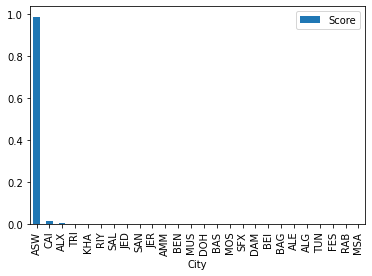

In [28]:
# plot the probabilities for each dialect
import pandas as pd
sentence = 'فيه ايه؟'
sentence = 'انت عاوز مني ايه؟'
predictions = did.predict([sentence])
sorted_cities = sorted(predictions[0].scores.items(),key=lambda x: x[1],reverse=True)
#print(sorted_cities)
df = pd.DataFrame(sorted_cities,columns=['City','Score']).set_index('City')
plt = df.plot.bar()

In [41]:
from camel_tools.sentiment import SentimentAnalyzer

sa = SentimentAnalyzer.pretrained()

# Predict the sentiment of a single sentence
sentiment = sa.predict_sentence('أنا بخير')
print(sentiment)
# Predict the sentiment of multiple sentences
sentences = [
    'أنا بخير',
    'أنا لست بخير',
    'اليوم هو الثاني من محرم'
]
predictions = sa.predict(sentences)
for sent, p in zip(sentences,predictions):
  print(sent,p)

positive
أنا بخير positive
أنا لست بخير negative
اليوم هو الثاني من محرم neutral


In [42]:
sentences = [
    'يا شينك',
    'يا ملحك',
    'اشبك؟',
    'وش فيك؟',
]
predictions = sa.predict(sentences)
for sent, p in zip(sentences,predictions):
  print(sent,p)

يا شينك negative
يا ملحك positive
اشبك؟ negative
وش فيك؟ negative
